# Analysing Barcelona's Airbnb data

### How Airbnb hosts have been affected by Covid-19

The data come from the following web: http://insideairbnb.com/get-the-data.html

Three key files:
- Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).  
- Summary information and metrics for listings in Barcelona (good for visualisations).  
- Neighbourhood list for geo filter. Sourced from city or open source GIS files.    
A file of more detailed information about the listings:  
- Listings detailed.

I will use these three summary files though there is more detailed information available.  
There is a data dictionary available in spreadsheet format.

Help from https://github.com/jordilucas16/Barcelona_AirBnb_Data_Analysis

**avaliability_x**: The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host.  
**number_of_reviews_ltm**: The number of reviews the listing has (in the last 12 months).  
**number_of_reviews**: The number of reviews the listing has.  
**reviews_per_month**: The number of reviews the listing has over the lifetime of the listing.  

### Questions

All the questions are related to the impact that the COVID-19 has had on the Airbnb business. These questions are:  
-Impact on prices?  
-Impact on the activity of the hosts (mesured by the number of reviews)?    
-Which are the most affected listings?  

To answer theses questions I do an exploratory analysis but I also use at end a model. 

----

In [ ]:
#Import libraries, read and show head datasets.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
#from statsmodels.tsa.filters.hp_filter import hpfilter
%matplotlib inline

In [622]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 200 
sns.set_style('whitegrid')
#pd.set_option('float_format', '{:f}'.format)
sns.set()

In [633]:
# APRIL 2021

#Read reviews dataset (relation between listings and review dates)
df_reviews = pd.read_csv('data/reviews.csv',parse_dates=['date'])

#Read neighbourhood dataset (relation between neighbourhoods_groups and neighbourhoods)
df_neighbourhood = pd.read_csv('data/neighbourhoods.csv')

#Read listings dataset (information about each airBnb listing in Barcelona city)
df = pd.read_csv('data/listings.csv', parse_dates=['last_review'])

print(df_reviews.shape)
print(df.shape)

(575424, 2)
(18226, 16)


In [267]:
# MAY 2020

df_reviews_may = pd.read_csv('data/reviews_may.csv',parse_dates=['date'])
df_may = pd.read_csv('data/listings_may.csv', parse_dates=['last_review'])

print(df_reviews_may.shape)
print(df_may.shape)

(722841, 2)
(20858, 16)


In [266]:
# DECEMBER 2019

df_reviews_2019 = pd.read_csv('data/reviews_2019.csv',parse_dates=['date'])
df_2019 = pd.read_csv('data/listings_2019.csv', parse_dates=['last_review'])

print(df_reviews_2019.shape)
print(df_2019.shape)

(740992, 2)
(20428, 16)


In [7]:
print( df_reviews.head() )
print( df_reviews.shape )

   listing_id       date
0       18674 2013-05-27
1       18674 2014-03-02
2       18674 2015-08-04
3       18674 2016-06-20
4       18674 2018-06-18
(575424, 2)


In [9]:
print( df_neighbourhood.head() )
print( df_neighbourhood.shape )

  neighbourhood_group                          neighbourhood
0        Ciutat Vella                         el Barri Gòtic
1        Ciutat Vella                               el Raval
2        Ciutat Vella                         la Barceloneta
3        Ciutat Vella  Sant Pere, Santa Caterina i la Ribera
4            Eixample                          el Fort Pienc
(73, 2)


In [10]:
# Principal dataset
print( df.head() )


      id                                               name  host_id  \
0  18674    Huge flat for 8 people close to Sagrada Familia    71615   
1  23197  Forum CCIB DeLuxe★Spacious &Elegant ★Large Bal...    90417   
2  32711                   Sagrada Familia area - Còrsega 1   135703   
3  34241                   Private Double room - Plaza Real    73163   
4  34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS    73163   

          host_name neighbourhood_group                       neighbourhood  \
0  Mireia And Maria            Eixample                  la Sagrada Família   
1    Etain (Marnie)          Sant Martí               el Besòs i el Maresme   
2              Nick              Gràcia  el Camp d'en Grassot i Gràcia Nova   
3            Andres        Ciutat Vella                      el Barri Gòtic   
4            Andres        Ciutat Vella                      el Barri Gòtic   

   latitude  longitude        room_type  price  minimum_nights  \
0  41.40556    2.17262  En

In [399]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.822600e+04,1.822600e+04,18226.000000,18226.000000,18226.000000,18226.000000,18226.000000,12560.000000,18226.000000,18226.000000
mean,2.678256e+07,1.142868e+08,41.392046,2.167207,110.391968,12.290135,31.571601,0.916842,15.663009,175.077911
std,1.463324e+07,1.158989e+08,0.014762,0.017874,429.069933,29.085228,63.896632,1.094043,30.699142,141.168304
min,1.867400e+04,3.073000e+03,41.349430,2.084030,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.497371e+07,9.536379e+06,41.380470,2.156670,35.000000,1.000000,0.000000,0.140000,1.000000,2.000000
50%,2.823997e+07,6.345155e+07,41.389320,2.168040,55.000000,3.000000,3.000000,0.480000,3.000000,179.000000
75%,4.036469e+07,2.063437e+08,41.401927,2.177820,103.000000,30.000000,32.000000,1.340000,14.000000,318.000000
max,4.915835e+07,3.940180e+08,41.463060,2.231980,11500.000000,1124.000000,808.000000,14.070000,164.000000,365.000000


In [200]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

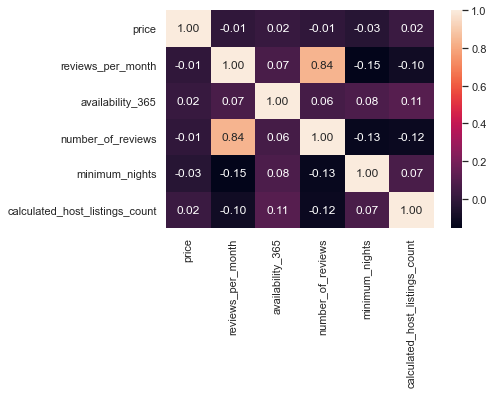

In [268]:
df_num = df[["price","reviews_per_month","availability_365","number_of_reviews","minimum_nights","calculated_host_listings_count"]]
sns.heatmap(df_num.corr(), annot=True, fmt=".2f");


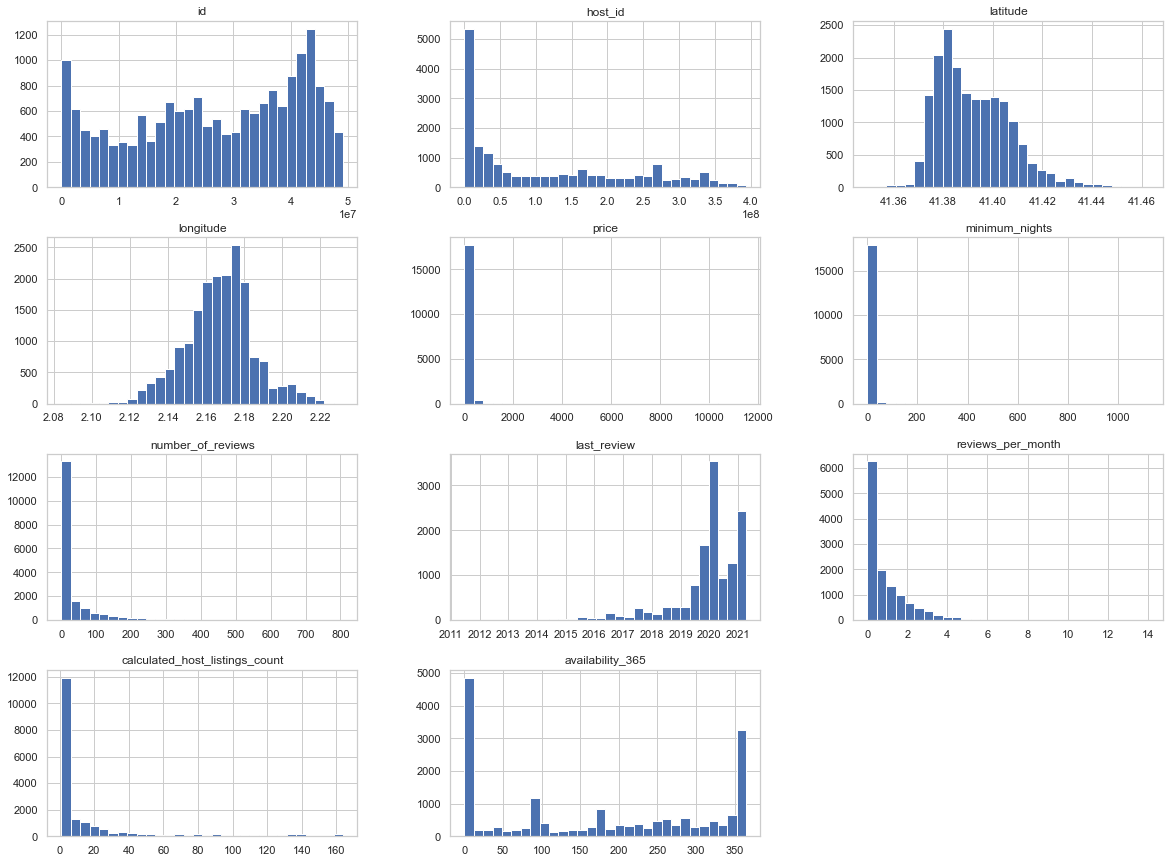

In [204]:
#Histogram for each numerical attribute
df.hist(bins=30, figsize=(20,15))
plt.show()

---

### Analysing missing values

In [396]:
df.isna().sum()

id                                   0
name                                11
host_id                              0
host_name                          539
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5666
reviews_per_month                 5666
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [635]:
np.round( df.isna().sum() / df.shape[0] *100, 1)

id                                 0.0
name                               0.1
host_id                            0.0
host_name                          3.0
neighbourhood_group                0.0
neighbourhood                      0.0
latitude                           0.0
longitude                          0.0
room_type                          0.0
price                              0.0
minimum_nights                     0.0
number_of_reviews                  0.0
last_review                       31.1
reviews_per_month                 31.1
calculated_host_listings_count     0.0
availability_365                   0.0
dtype: float64

In [636]:
np.round( df.isna().sum()[df.isna().any()] / df.shape[0]*100, 1)

name                  0.1
host_name             3.0
last_review          31.1
reviews_per_month    31.1
dtype: float64

The are only 4 variables with missing values. And two of them (*name* and *host_name*) are not rellevant for the analysis. On the other hand, the variables related to the reviews are important and have a substantial number NaN. When doing the model I will consider how to proceed with this issue. 

---

### Analysing the number of reviews using scrape data of three different periods

First I start by looking at the evolution during the last years using the most recent data from April 2021. 

In [645]:
# make new dataframe for number of reviews
rev_freq = pd.DataFrame(df_reviews['date'].value_counts().values,
                        index=df_reviews['date'].value_counts().index,
                        columns=['Number of reviews'])

In [646]:
rev_freq["time"] = rev_freq.index

In [647]:
rev_freq.dtypes

Number of reviews             int64
time                 datetime64[ns]
dtype: object

In [648]:
rev_freq = rev_freq.rename(columns={"Number of reviews": "Data_from_April2021"})
#rev_freq["date"] = pd.to_datetime(rev_freq["time"])

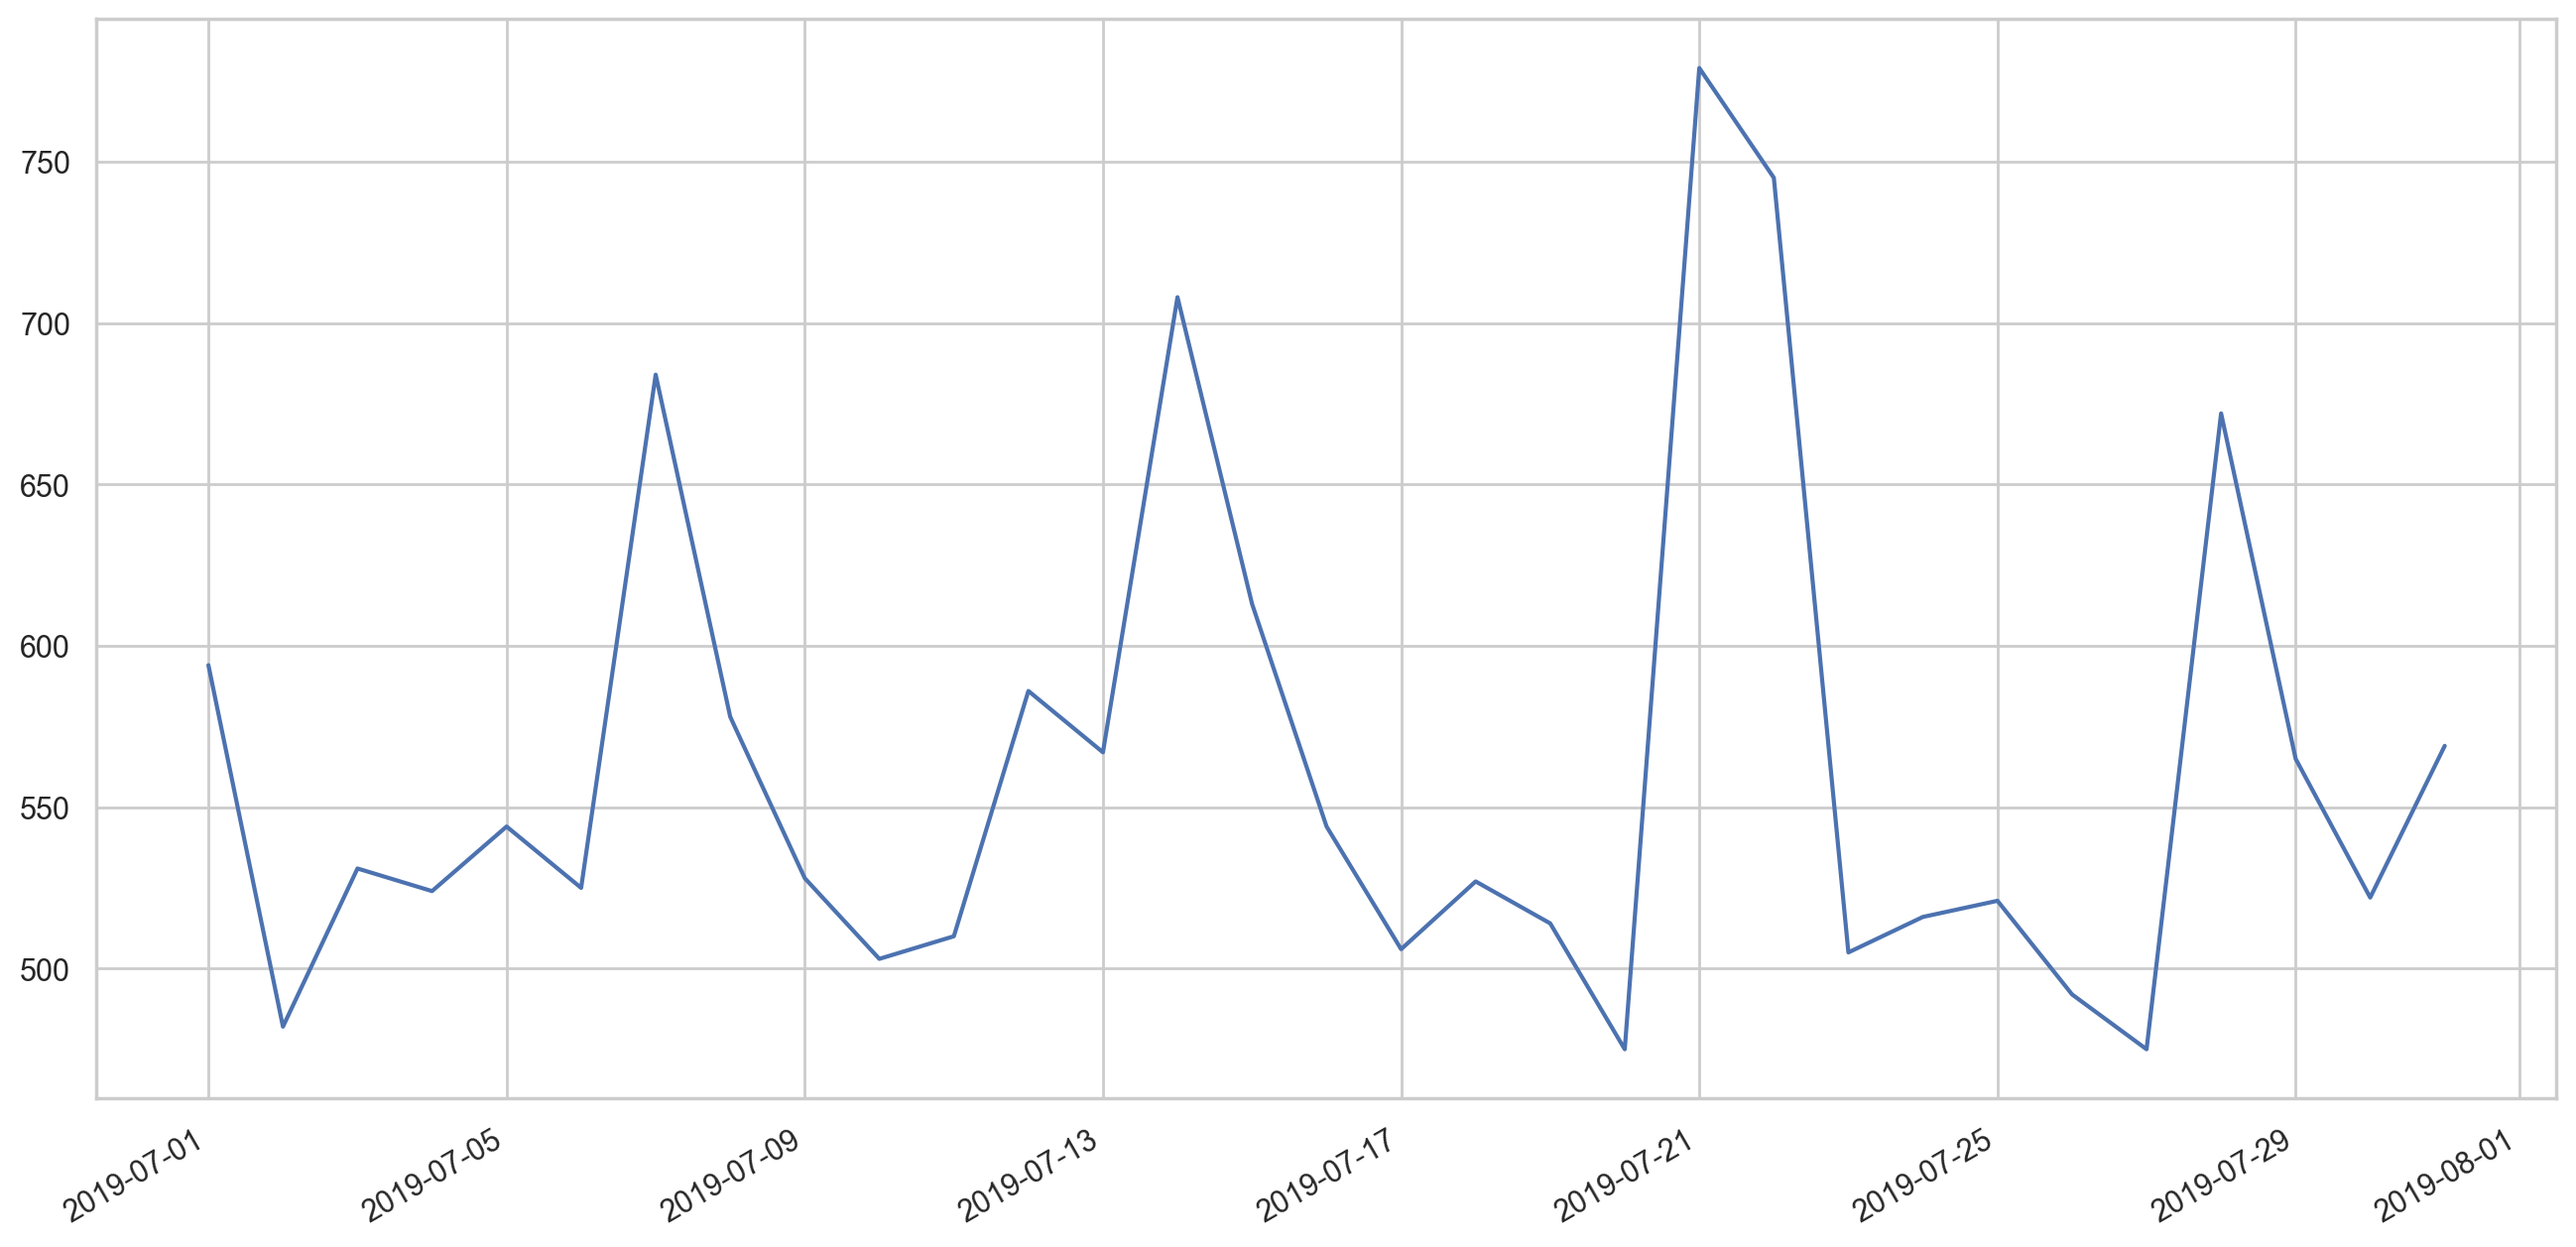

In [650]:
rev_freq["Data_from_April2021" ].loc["2019-07"].plot(figsize=(16, 8));

There is a lot of variability from one day to another. So probably is better to aggregate the data by month using the sum. 

In [651]:
# Select 2019 year
rev_freq_2019 = rev_freq.loc['2019']

# Calculates review per month in selected year
rev_2019_months = rev_freq_2019.resample('M').sum()
rev_2019_months['%'] = (rev_2019_months['Data_from_April2021']*100) / rev_2019_months['Data_from_April2021'].sum()

rev_2019_months

,Data_from_April2021,%
2019-01-31,8680,4.948012
2019-02-28,9747,5.556252
2019-03-31,13013,7.418027
2019-04-30,15013,8.558122
2019-05-31,17052,9.720449
2019-06-30,17918,10.214110
2019-07-31,17404,9.921105
2019-08-31,16364,9.328256
2019-09-30,18607,10.606872
2019-10-31,18554,10.576660


In [652]:
# Select 2020 year
rev_freq_2020 = rev_freq.loc['2020']

# Calculates review per month in selected year
rev_2020_months = rev_freq_2020.resample('M').sum()
rev_2020_months['%'] = (rev_2020_months['Data_from_April2021']*100) / rev_2020_months['Data_from_April2021'].sum()

rev_2020_months

,Data_from_April2021,%
2020-01-31,11357,24.620621
2020-02-29,12479,27.052983
2020-03-31,7028,15.235865
2020-04-30,258,0.559313
2020-05-31,312,0.676379
2020-06-30,839,1.818852
2020-07-31,3585,7.771852
2020-08-31,3038,6.586022
2020-09-30,2269,4.918921
2020-10-31,2260,4.899410


Dramatic decrease between April-June of 2020 in the number of reviews. 

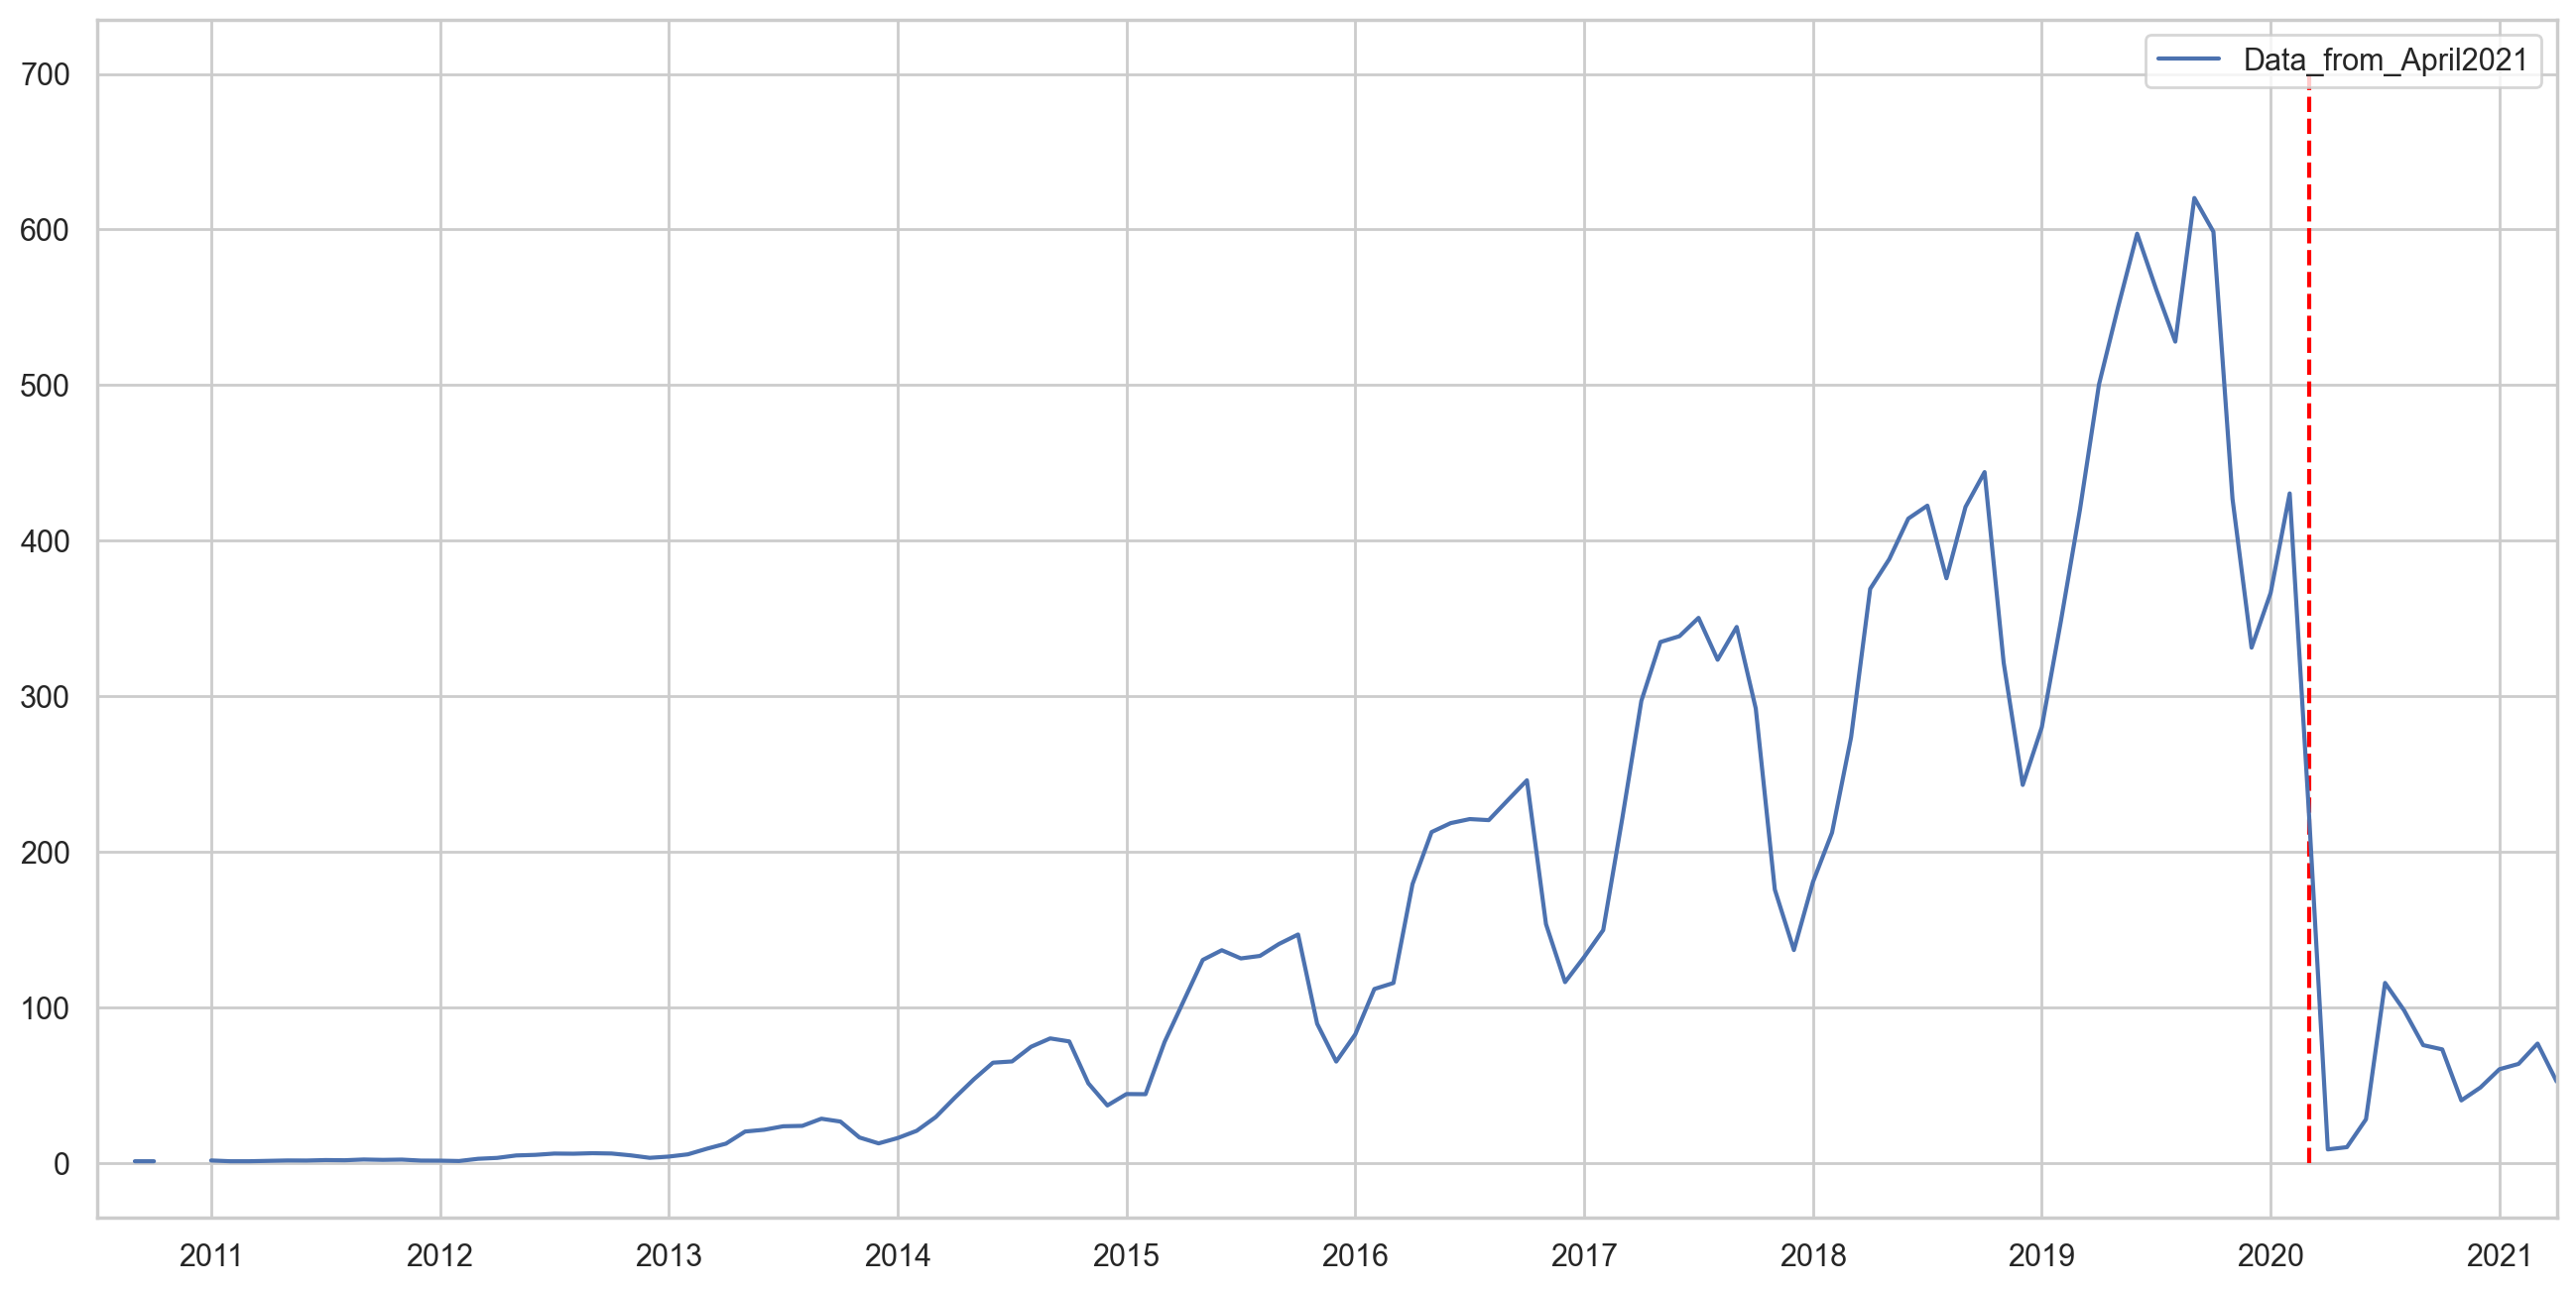

In [663]:
rev_freq_month = rev_freq.resample('M').mean()
rev_freq_month.plot(figsize = (16, 8))
plt.vlines(x = "2020-03-14", colors = "red", ls = '--', label = "First COVID lockdown", ymin = 0, ymax = 700);

In [664]:
# make new dataframe for number of reviews
rev_freq_2019 = pd.DataFrame(df_reviews_2019['date'].value_counts().values,
                             index = df_reviews_2019['date'].value_counts().index,
                             columns = ['Number of reviews'])

rev_freq_2019 = rev_freq_2019.rename(columns = {"Number of reviews": "Data_from_Dec2019"})
rev_freq_2019_month = rev_freq_2019.resample('M').mean()

#rev_freq_2019_month.plot(figsize=(16, 8))
#plt.vlines(x= "2020-03-14",colors ="red", ls='--', label="First COVID lockdown", ymin=0, ymax=700);

# make new dataframe for number of reviews
rev_freq_may = pd.DataFrame(df_reviews_may['date'].value_counts().values,
                            index = df_reviews_may['date'].value_counts().index,
                            columns = ['Number of reviews'])

rev_freq_may = rev_freq_may.rename(columns = {"Number of reviews": "Data_from_May2020"})
rev_freq_may_month = rev_freq_may.resample('M').mean()

In [665]:
# Select 2019 year
#rev_freq_2019 = rev_freq_2019.loc['2020']
# Calculates review per month in selected year
rev_2019_months = rev_freq_2019.resample('M').sum()
rev_2019_months['%'] = (rev_2019_months['Data_from_Dec2019']*100) / rev_2019_months['Data_from_Dec2019'].sum()

rev_2019_months

,Data_from_Dec2019,%
2010-07-31,1,0.000135
2010-08-31,2,0.000270
2010-09-30,4,0.000540
2010-10-31,2,0.000270
2010-11-30,0,0.000000
...,...,...
2019-07-31,28973,3.910029
2019-08-31,28067,3.787760
2019-09-30,32730,4.417052
2019-10-31,31250,4.217319


In [657]:
result = pd.concat([rev_freq_month, rev_freq_may_month, rev_freq_2019_month], axis = 1)

In [658]:
result.head()

,Data_from_April2021,Data_from_May2020,Data_from_Dec2019
2010-07-31,1.0,1.0,1.0
2010-08-31,NaN,NaN,1.0
2010-09-30,1.0,1.0,1.0
2010-10-31,1.0,1.0,1.0
2010-11-30,NaN,NaN,NaN


In [659]:
from datetime import datetime
datetime(2020, 3, 14) # check

datetime.datetime(2020, 3, 14, 0, 0)

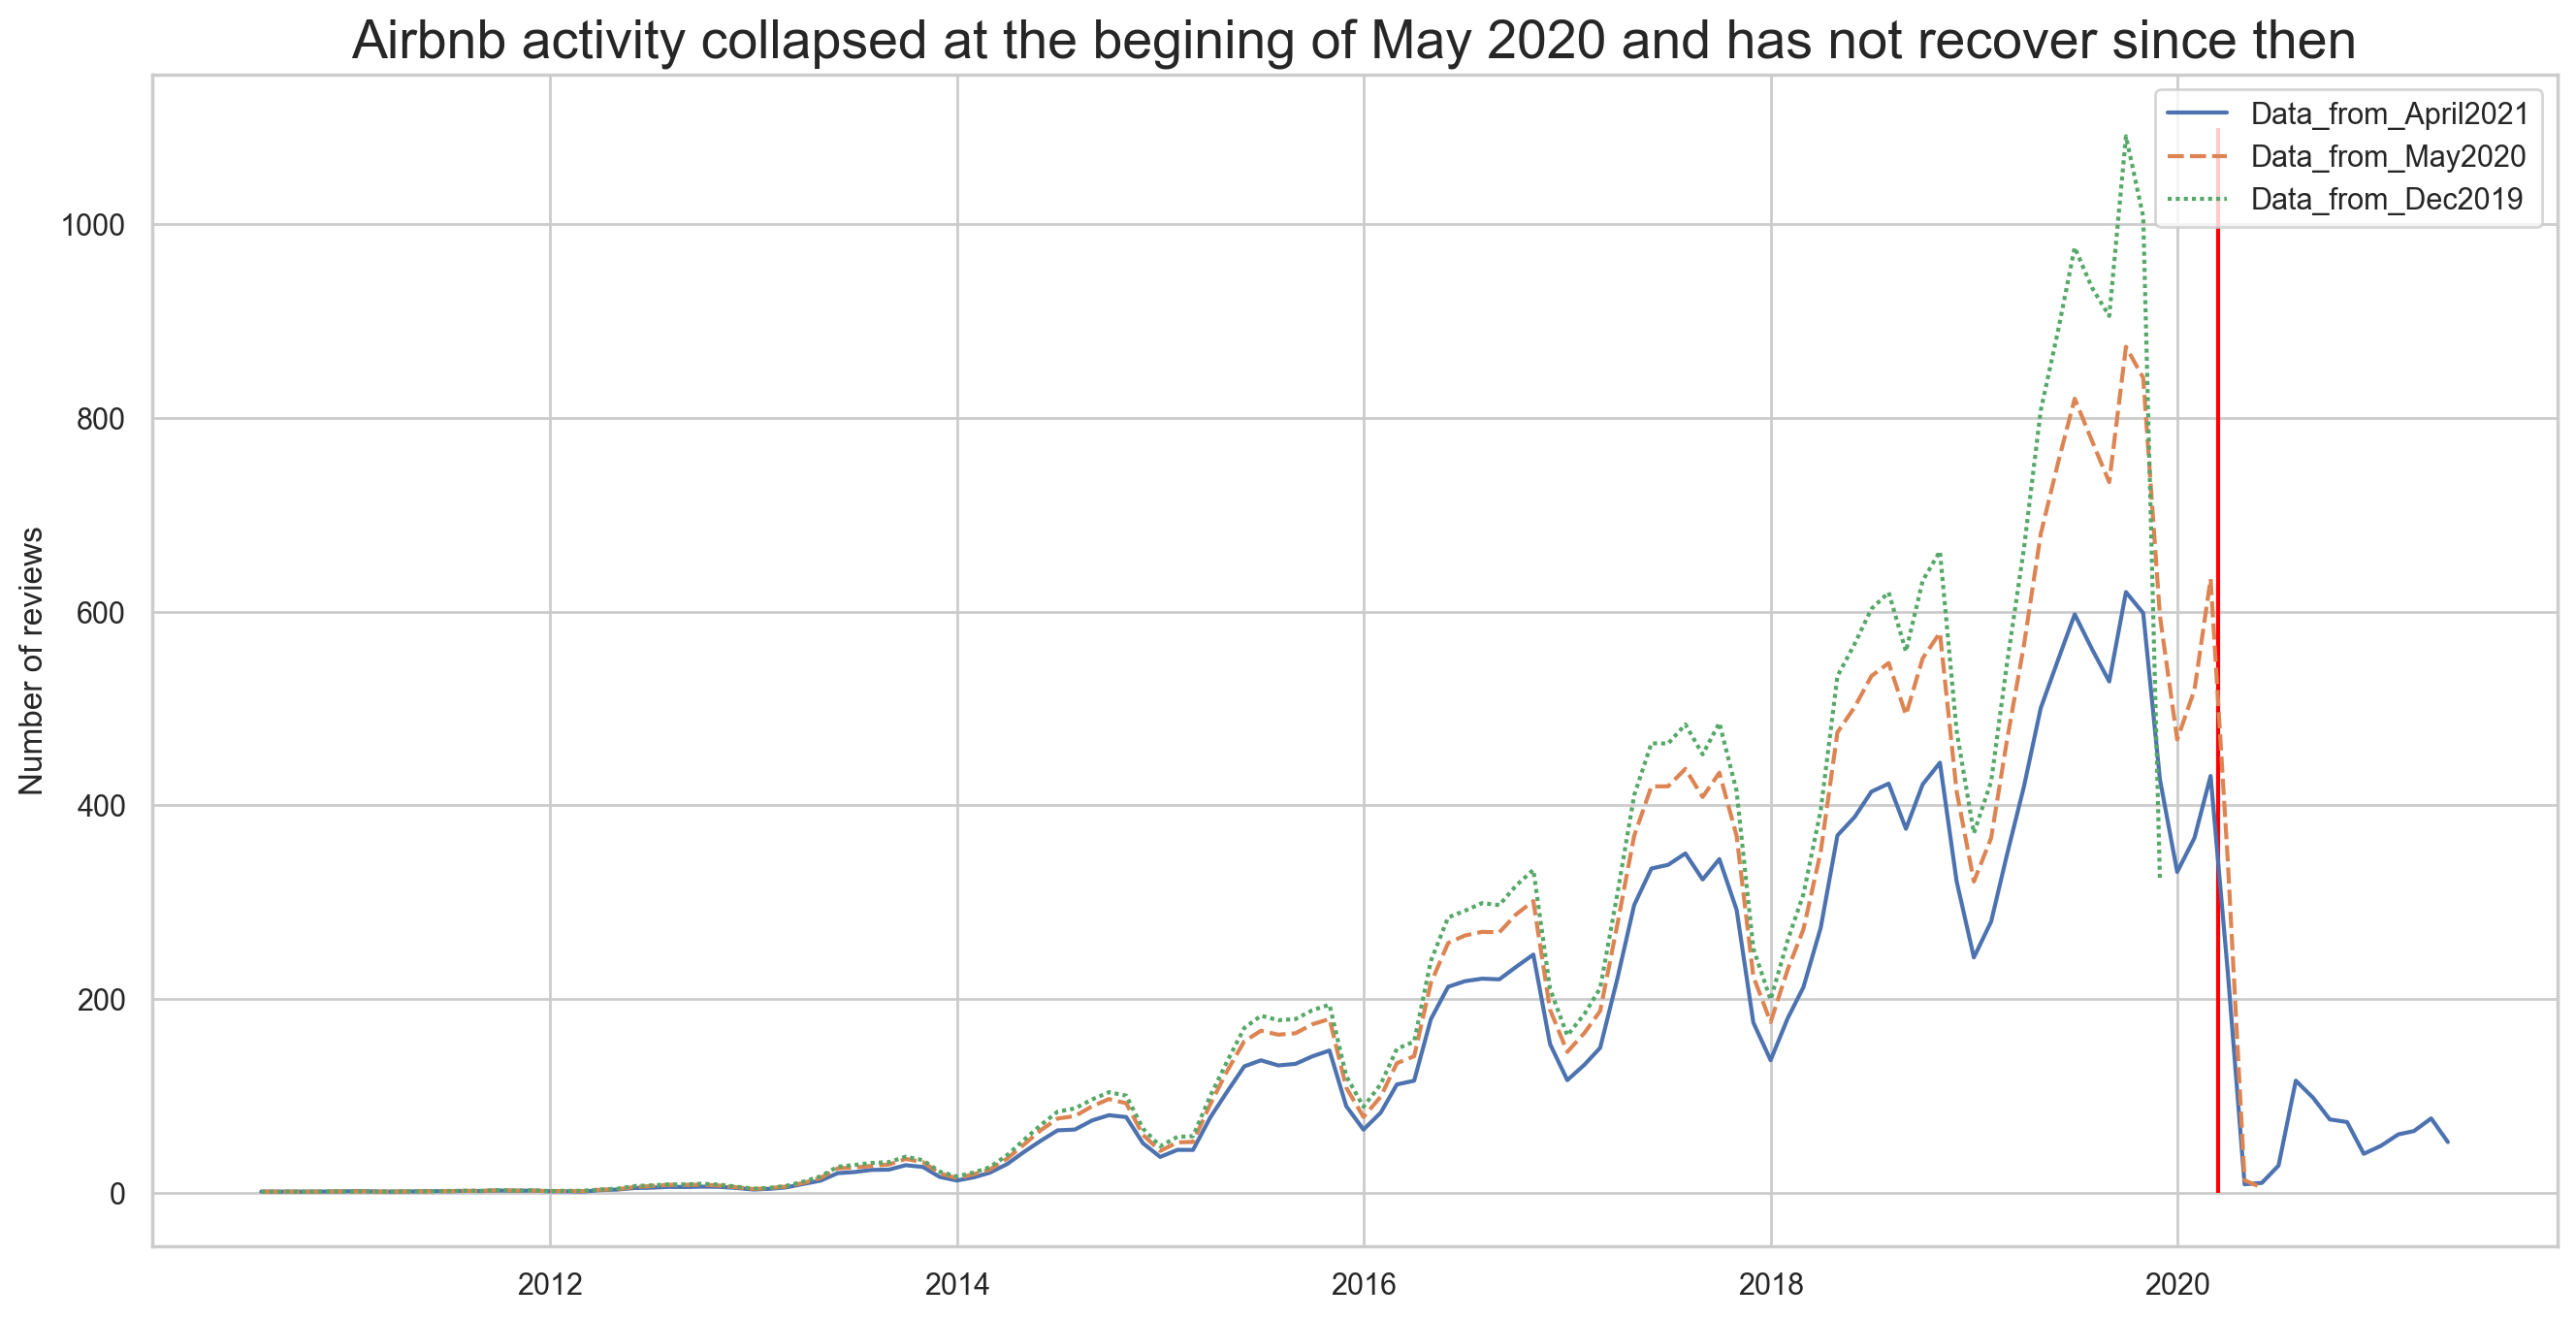

In [660]:
sns_plot = sns.lineplot(data = result);
#plt.axvline(2.8, 0,0.17)
#"2020-03-14"
sns_plot.vlines(x = datetime(2020, 3, 14), colors = "red", ls = '-', label = "First COVID lockdown", ymin = 0, ymax = 1100);
sns_plot.set_title('Airbnb activity collapsed at the begining of May 2020 and has not recover since then', size = 20 )
sns_plot.set_ylabel('Number of reviews')
sns_plot.figure.savefig("evolution_reviews_comparation.png", dpi = 350)

`Assumptions`:  
* Reviews are very related to the number of booking.  
* No structural change in the series, that is, for example, the probability of doing a review per booking has stayed the same through the years. 

***

## Analysing prices

***

The price is probably the most important variable of the datasets. Here I analyse the distribution of this variable through descriptive methods. 

In [662]:
frame = { 'April 2021': df.price, 'May 2020': df_may.price, 'Dec 2019': df_2019.price }
dist_price = pd.DataFrame(frame)
dist_price.describe([0.01,.05, 0.1, 0.9,0.95,0.99]).round(decimals = 1)

,April 2021,May 2020,Dec 2019
count,18226.0,20858.0,20428.0
mean,110.4,124.2,134.6
std,429.1,405.9,479.0
min,0.0,0.0,0.0
1%,12.0,15.0,15.0
5%,18.0,20.0,21.0
10%,23.0,25.0,26.0
50%,55.0,59.0,60.0
90%,172.0,183.0,190.0
95%,255.0,300.0,302.6


**Median** prices 60 -> 59 -> 55, they decreased by 5 euros from Dec2019 to April 2021 (8.3%).  
The **average** also declines persistently.  
The **Count** row indicates the number of listing in the three different periods. Surprisingly in May2020 there are more listings than some months ago. But one year later, the number of listings has declined a 12.6%. 

In [290]:
print( df.price.describe() , "\n\n")
print( df.price[ df.price < 715 ].describe() )
#df.price[ df.price < 715 ].hist(bins=15); #99%
#df.price[ df.price < 260 ].hist(bins=20); #95%

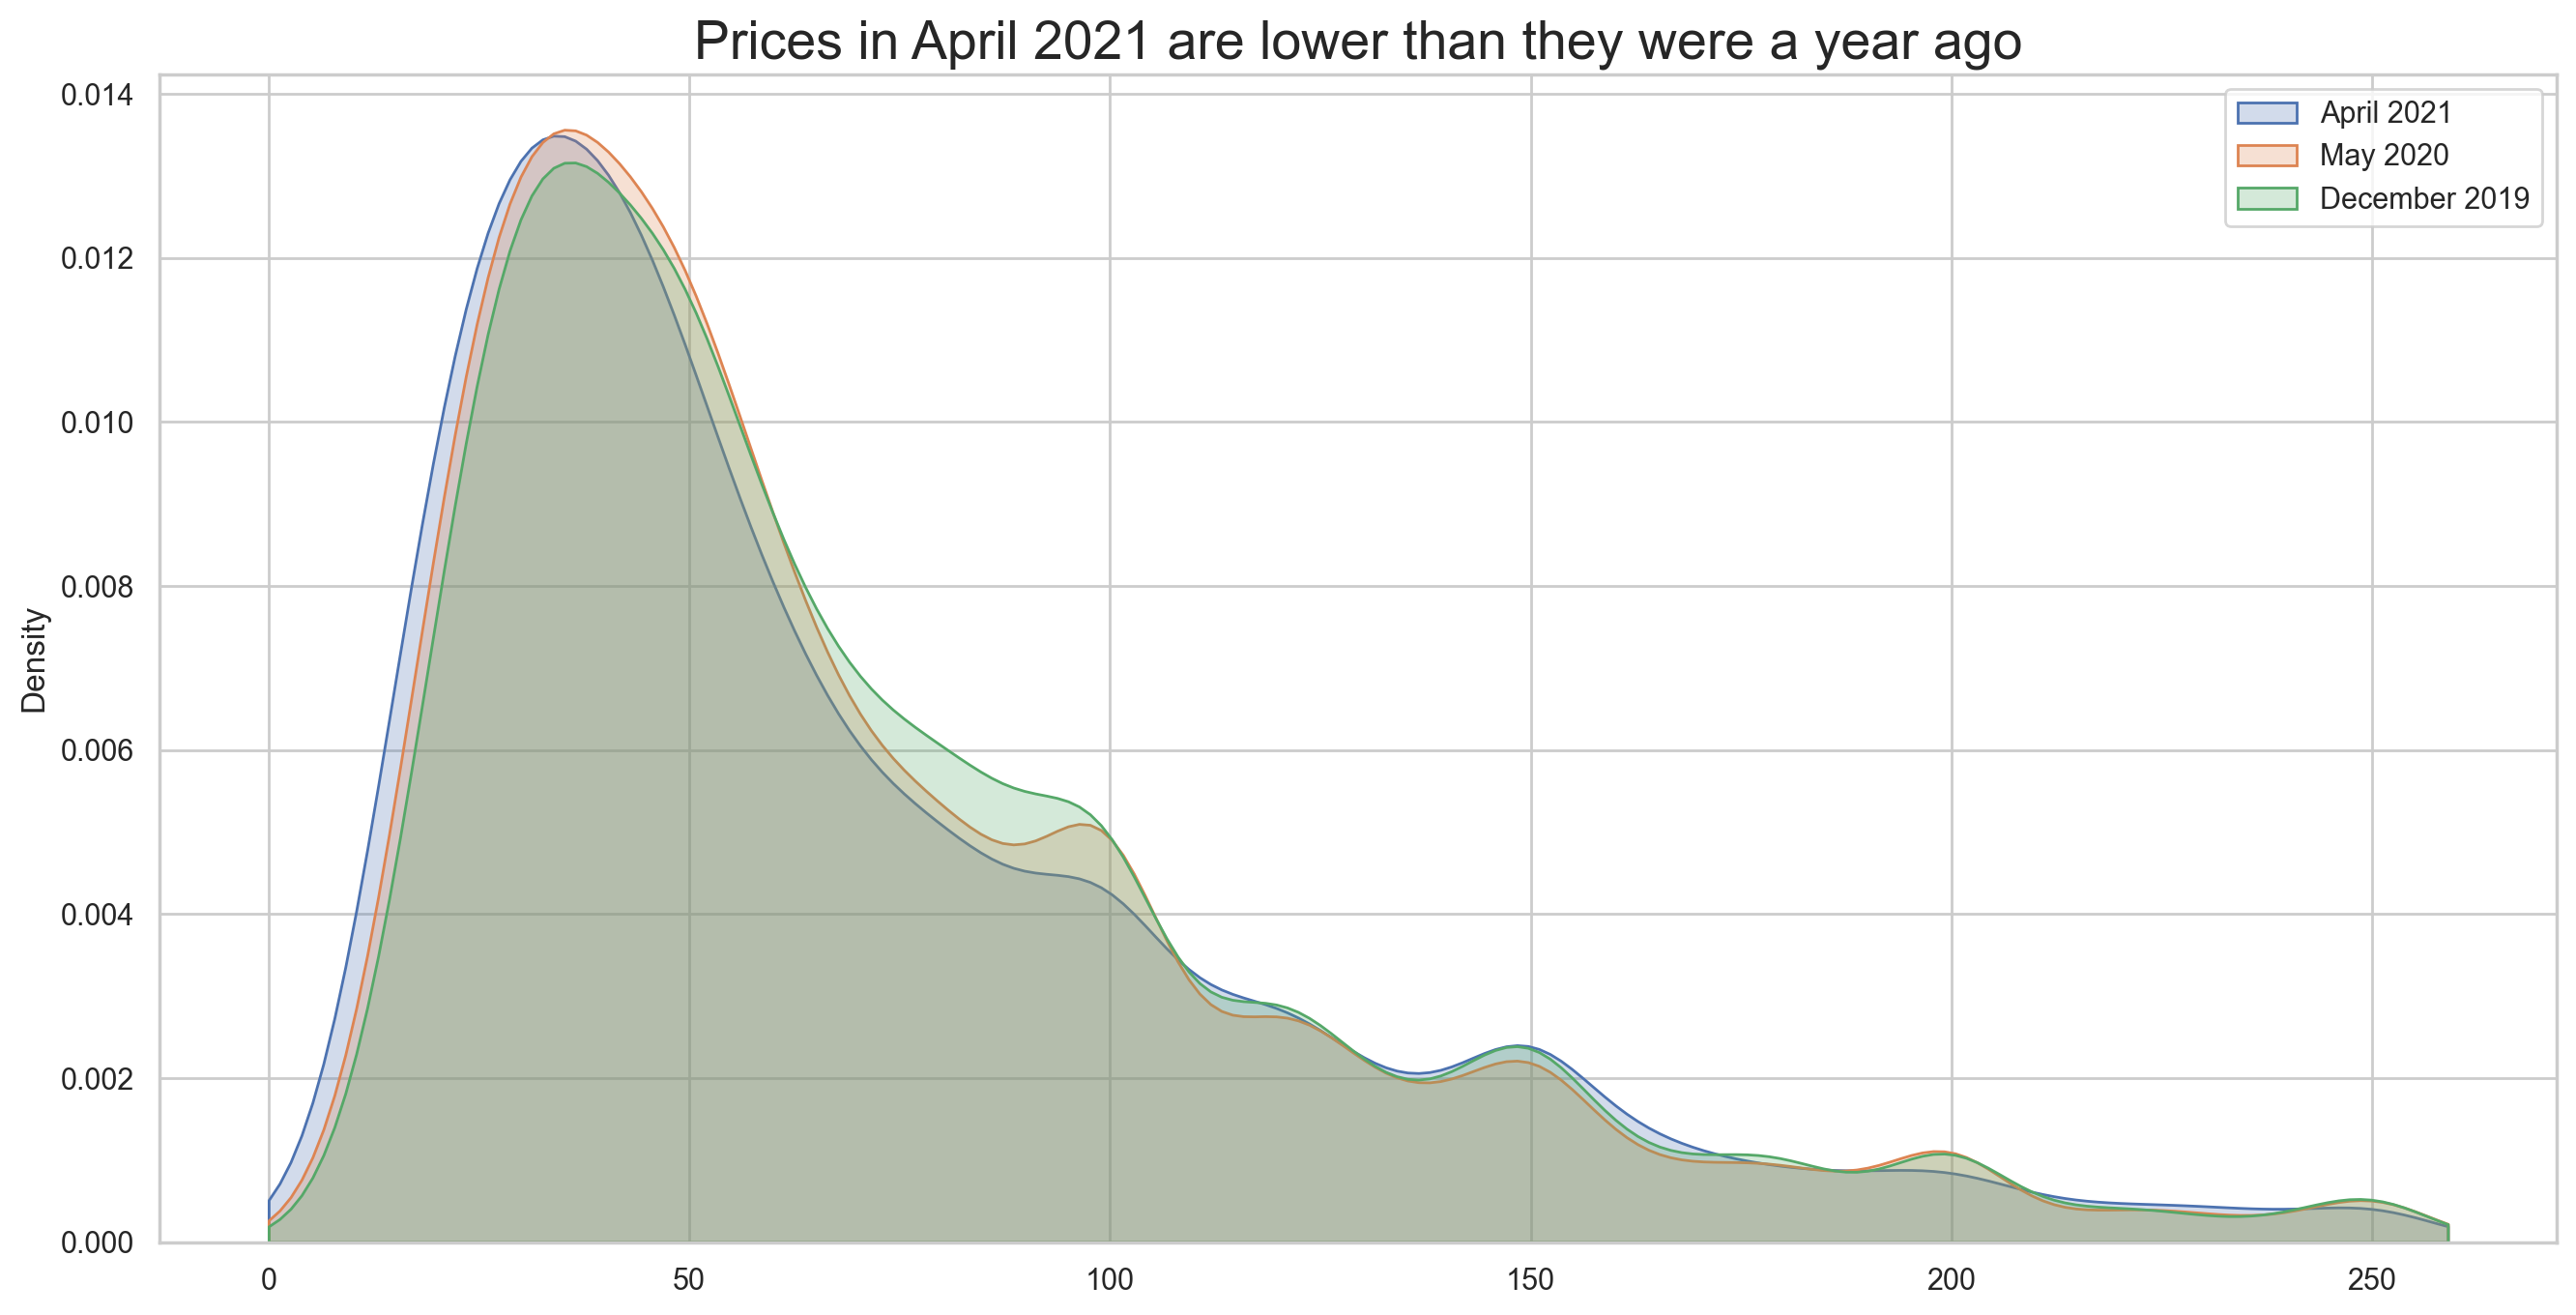

In [695]:
sns_plot = sns.kdeplot( np.array(df.price[ df.price < 260 ]) , bw_adjust=1, fill=True, cut=0, label="April 2021");
sns.kdeplot( np.array(df_may.price[ df_may.price < 260 ]) , bw_adjust=1, fill=True, cut=0, label="May 2020");
sns.kdeplot( np.array(df_2019.price[ df_2019.price < 260 ]) , bw_adjust=1, fill=True, cut=0, label="December 2019");
sns_plot.legend();
sns_plot.set_title('Prices in April 2021 are lower than they were a year ago', size = 20 );
#sns_plot.set_ylabel('Number of reviews')
sns_plot.figure.savefig("structure_prices_comparation.png", dpi=350)

If we look at the structure of the salaries (estimating using KDE), we can see that the change in listing is concentrated mosty in the range 70-100 euros (above average). 

Because of the asymmetric structure, probably it's better to use the median than the mean.

In [683]:
#Relation beetwen price and type room
df_price_room_type = pd.DataFrame(df.groupby(['room_type']).median()['price'].sort_values())
print("April 2021 \n", df_price_room_type, "\n")
#Show price per room type
#show_barplot(df.price, df.room_type, 'Price', 'Room type', 'Price according the room type', 80)

df_price_room_type = pd.DataFrame(df_may.groupby(['room_type']).median()['price'].sort_values())
print("May 2020 \n", df_price_room_type, "\n")

df_price_room_type = pd.DataFrame(df_2019.groupby(['room_type']).median()['price'].sort_values())
print("December 2019 \n", df_price_room_type)

April 2021 
                  price
room_type             
Shared room       35.0
Private room      36.0
Entire home/apt   93.0
Hotel room       103.0 

May 2020 
                  price
room_type             
Shared room       35.0
Private room      40.0
Entire home/apt   95.5
Hotel room       178.5 

December 2019 
                  price
room_type             
Shared room       35.0
Private room      40.0
Entire home/apt  100.0
Hotel room       160.0


To put into context the difference on prices; consider the difference on the type of rooms:

In [694]:
print("April 2021 \n", df.room_type.value_counts(), "\n" )
print("December 2019 \n", df_2019.room_type.value_counts() )

April 2021 
 Entire home/apt    9001
Private room       8710
Hotel room          283
Shared room         232
Name: room_type, dtype: int64 

December 2019 
 Private room       10387
Entire home/apt     9268
Hotel room           615
Shared room          158
Name: room_type, dtype: int64


***

### Joining listings datasets of two periods

Comparison between May2020 and April2021

`Assumption:` The variable ID is a unique identifier of a listing **over time**.

In [317]:
df.id.describe()

count    1.822600e+04
mean     2.678256e+07
std      1.463324e+07
min      1.867400e+04
25%      1.497371e+07
50%      2.823997e+07
75%      4.036469e+07
max      4.915835e+07
Name: id, dtype: float64

In [320]:
df_may.id.head()

0    21974
1    23197
2    31958
3    32471
4    32711
Name: id, dtype: int64

In [347]:
comparation = pd.merge(df_may, df, on = "id", how = "left")
comparation.shape

(20858, 31)

In [348]:
comparation.tail()

,id,name_x,host_id_x,host_name_x,neighbourhood_group_x,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,latitude_y,longitude_y,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y
20853,43397000,LONG STAY ROOM.,283428250,Violetta,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.38813,2.17800,Private room,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
20854,43397534,New Room with Balcony in Plaza Spain,280455133,Alex,Eixample,la Nova Esquerra de l'Eixample,41.37967,2.15075,Private room,30,...,41.37966,2.15026,Private room,30.0,4.0,0.0,NaT,NaN,1.0,365.0
20855,43400914,poblenou,345695951,Anna,Sant Martí,el Poblenou,41.39974,2.20735,Entire home/apt,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
20856,43401348,Large bedroom. Central flat shared only with host,305221520,Anna,Ciutat Vella,el Raval,41.38454,2.16866,Private room,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
20857,43404391,Un oasis en el corazón de sagrada familia,345875206,Daniel,Eixample,la Sagrada Família,41.40107,2.17457,Entire home/apt,59,...,41.40175,2.17449,Entire home/apt,59.0,30.0,0.0,NaT,NaN,2.0,365.0


In [327]:
comparation.dtypes

id                                           int64
name_x                                      object
host_id_x                                    int64
host_name_x                                 object
neighbourhood_group_x                       object
neighbourhood_x                             object
latitude_x                                 float64
longitude_x                                float64
room_type_x                                 object
price_x                                      int64
minimum_nights_x                             int64
number_of_reviews_x                          int64
last_review_x                       datetime64[ns]
reviews_per_month_x                        float64
calculated_host_listings_count_x             int64
availability_365_x                           int64
name_y                                      object
host_id_y                                  float64
host_name_y                                 object
neighbourhood_group_y          

In [339]:
print(df_may.shape[0])
print(df.shape[0])
print( df_may.shape[0] - df.shape[0])

20858
18226
2632


In [343]:
df_inner = pd.merge(df,df_may, on = "id", how = "inner")
df_inner.shape

(14420, 31)

In [344]:
df_inner.shape[0]-df_may.shape[0]

-6438

In [346]:
df_inner.shape[0]-df.shape[0]

-3806

On one hand, the are 3806 new listings in April2021 with respect to May2020, on the other hand, 6438 listings were removed during this period. 

In [355]:
remain = np.isin(  df_may.id.to_numpy(),  df_inner.id.to_numpy() )
df_may["remain"] = remain

In [357]:
pd.DataFrame(df_may.groupby(['remain']).mean()['price'].sort_values())

,price
remain,
False,108.142125
True,131.384743


In [372]:
pd.DataFrame(df_may.groupby(['remain']).mean())[ [ "price","number_of_reviews" ,"availability_365","calculated_host_listings_count"]  ]

,price,number_of_reviews,availability_365,calculated_host_listings_count
remain,,,,
False,108.142125,29.823858,191.377291,13.852905
True,131.384743,36.812413,194.502011,15.338766


---

### Model

Find out which variables influence how likely is a listing of remaining on the web through the year the coronavirus hit.

In [576]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve
from sklearn.metrics import r2_score, mean_squared_error

Loading the same files but with more variables:

I only need the file of the detailed listing for May 2020. For this dataset I will differentiate between those listings that are still available on April 2021 and those that have disappeared from the Airbnb platform. 

In [498]:
df_may_detailed = pd.read_csv('data/listings_may_detailed.csv')
#df_may = pd.read_csv('data/listings_may.csv', parse_dates=['last_review'])

print(df_may_detailed.shape)
print(df_may.shape)

(20858, 106)
(20858, 17)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [414]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [415]:
print_full(df_may_detailed.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

Selecting the most **interesting variables:** neighbourhood, room_type, bedrooms(num), price (object to numeric), availability_90 (num), number_of_reviews (num), review_scores_rating, calculated_host_listings_count.

In [409]:
df_may_detailed.weekly_price.describe()

count        1151
unique        249
top       $250.00
freq           55
Name: weekly_price, dtype: object

It is necessary to depure the variable Price. 

In [454]:
df_may_detailed["price2"] = df_may_detailed.price.str.slice(start = 1).str.replace(',',"").astype(float)

s = pd.Series(['1.0', '2,000.0', -3])
s.str.replace(',', "")
#pd.to_numeric(s)

In [455]:
df_may_detailed.calculated_host_listings_count.describe()

count    20858.000000
mean        14.880142
std         31.028560
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max        173.000000
Name: calculated_host_listings_count, dtype: float64

In [496]:
df_may_detailed.review_scores_rating.describe()

count    15277.000000
mean        91.011586
std         10.332787
min         20.000000
25%         88.000000
50%         93.000000
75%         98.000000
max        100.000000
Name: review_scores_rating, dtype: float64

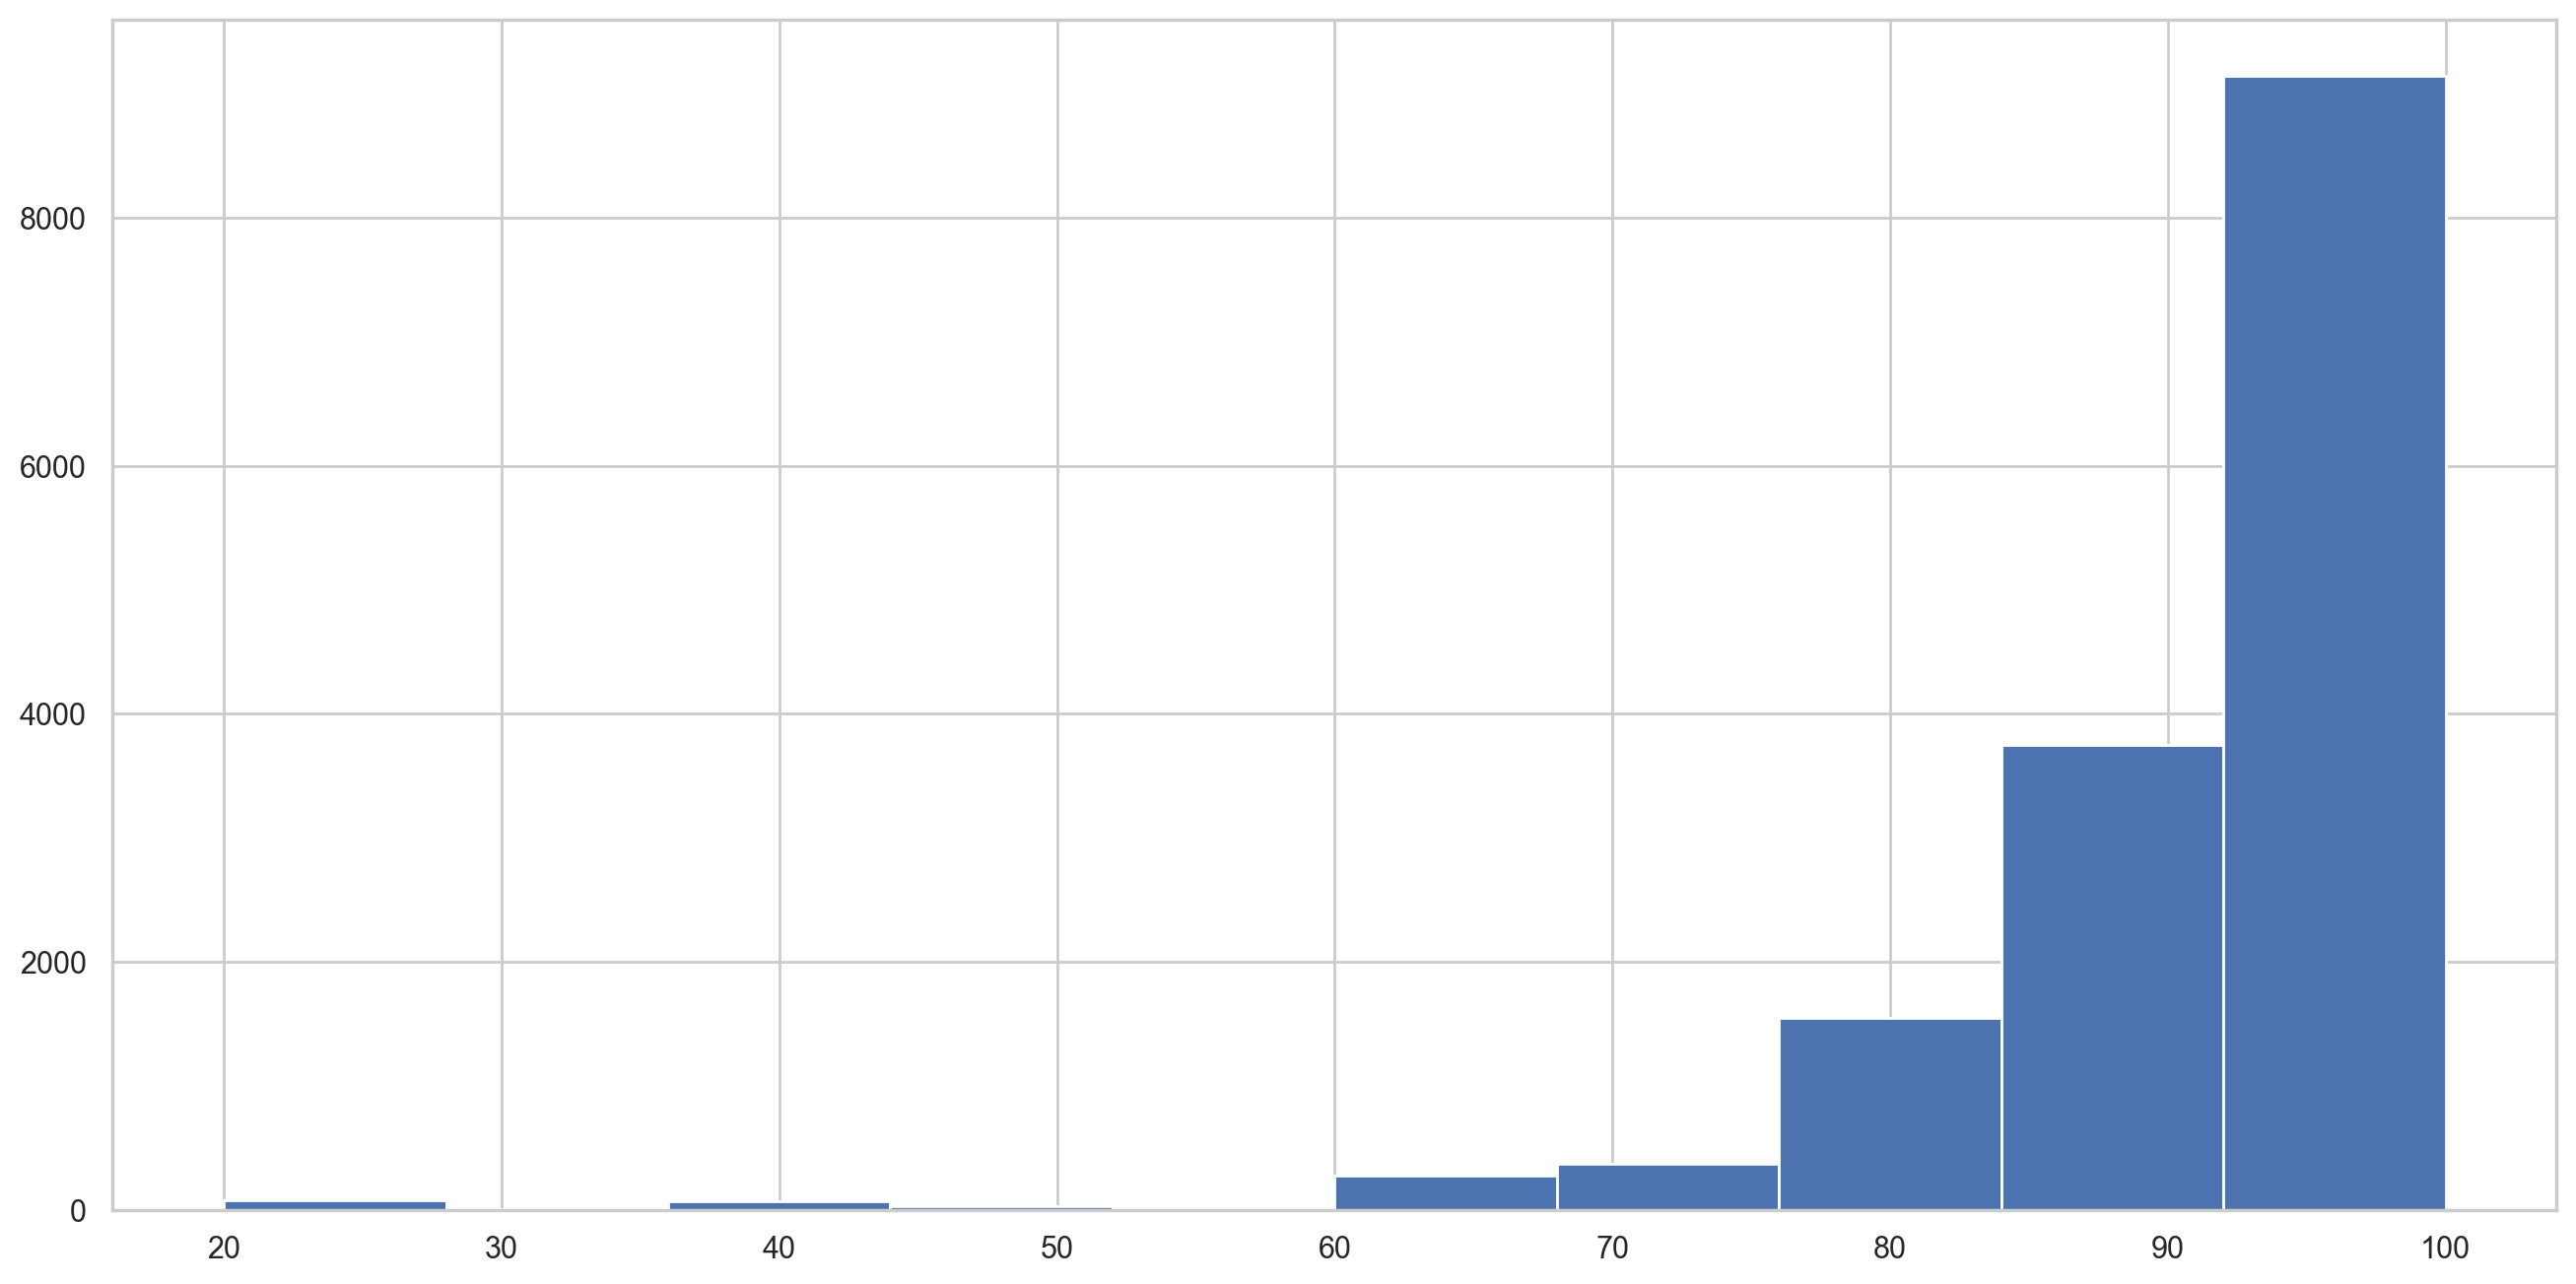

In [500]:
df_may_detailed.review_scores_rating.hist();

In [486]:
#neighbourhood_group_cleansed
df_model = df_may_detailed[[  "room_type", "bedrooms", 
                            "price2", "availability_90", "calculated_host_listings_count", 
                            "review_scores_rating", "number_of_reviews" ]] 

In [472]:
df_model.head()

,neighbourhood_group_cleansed,room_type,bedrooms,price2,availability_90,number_of_reviews,review_scores_rating,calculated_host_listings_count
0,Ciutat Vella,Private room,1.0,60.0,90,2,100.0,3
1,Sant Martí,Entire home/apt,3.0,220.0,79,52,95.0,2
2,Gràcia,Entire home/apt,1.0,58.0,64,188,91.0,29
3,Gràcia,Entire home/apt,3.0,66.0,62,94,87.0,29
4,Gràcia,Entire home/apt,2.0,140.0,65,63,86.0,6


In [479]:
df_model.neighbourhood_group_cleansed.value_counts()

Eixample               7033
Ciutat Vella           4966
Sants-Montjuïc         2404
Sant Martí             2132
Gràcia                 1771
Sarrià-Sant Gervasi     785
Horta-Guinardó          683
Les Corts               456
Sant Andreu             348
Nou Barris              280
Name: neighbourhood_group_cleansed, dtype: int64

In [480]:
df_model.room_type.value_counts()

Private room       10610
Entire home/apt     9554
Hotel room           454
Shared room          240
Name: room_type, dtype: int64

In [522]:
y = df_may['remain'].astype(int)
#X = df_model
y.isna().sum()

0

In [487]:
cat_vars_int = df_model.select_dtypes(include=['object']).copy().columns
cat_vars_int

Index(['room_type'], dtype='object')

In [484]:
pd.get_dummies(df_model["neighbourhood_group_cleansed"] )

,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20853,1,0,0,0,0,0,0,0,0,0
20854,0,1,0,0,0,0,0,0,0,0
20855,0,0,0,0,0,0,0,1,0,0
20856,1,0,0,0,0,0,0,0,0,0


In [488]:
for var in  cat_vars_int:
    # for each cat add dummy var, drop original column
    X = pd.concat([df_model.drop(var, axis=1), pd.get_dummies(df_model[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

X.dtypes

bedrooms                          float64
price2                            float64
availability_90                     int64
number_of_reviews                   int64
review_scores_rating              float64
calculated_host_listings_count      int64
room_type_Hotel room                uint8
room_type_Private room              uint8
room_type_Shared room               uint8
dtype: object

In [485]:
X.head()

,neighbourhood_group_cleansed,bedrooms,price2,availability_90,number_of_reviews,review_scores_rating,calculated_host_listings_count,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Ciutat Vella,1.0,60.0,90,2,100.0,3,0,1,0
1,Sant Martí,3.0,220.0,79,52,95.0,2,0,0,0
2,Gràcia,1.0,58.0,64,188,91.0,29,0,0,0
3,Gràcia,3.0,66.0,62,94,87.0,29,0,0,0
4,Gràcia,2.0,140.0,65,63,86.0,6,0,0,0


In [ ]:
#df_result = pd.concat([df, df_fillna], axis=1, join='inner')
#df_result.shape

In [495]:
X.isna().sum()

bedrooms                            26
price2                               0
availability_90                      0
number_of_reviews                    0
review_scores_rating              5581
calculated_host_listings_count       0
room_type_Hotel room                 0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

In [510]:
X["bedrooms"] = X.fillna(np.mean(X["bedrooms"] ))

In [511]:
np.mean(X["bedrooms"])

1.5493951612903225

In [514]:
X = X.drop("review_scores_rating", axis = 1)

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 97)

In [532]:
X_train.head()

,bedrooms,price2,availability_90,number_of_reviews,calculated_host_listings_count,room_type_Hotel room,room_type_Private room,room_type_Shared room
10235,0.0,45.0,90,1,17,0,0,0
14353,1.0,29.0,84,24,2,0,1,0
14843,0.0,24.0,84,0,1,0,1,0
17353,1.0,120.0,50,5,6,0,0,0
7431,1.0,20.0,90,13,2,0,1,0


In [543]:
y_train.value_counts()

1    10127
0     4473
Name: remain, dtype: int64

To sum up:  
-**Dependent variable** (y): Binary variable that indicates if the listing is still available in April 2021.  
-**Explanatory variables** (X): Number of bedrooms, price, availability in the next 90 days, historic number of reviews, total number of listings of the host, room type offered.

---

### Training of the models

In [533]:
log_model = LogisticRegression(random_state = 97, solver = 'liblinear',) # Here you could set any hyperparameters of your model
log_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = log_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.
log_model.score(X_test,y_test)
# the ratio of the number of correct predictions to the number of observations

0.6860019175455417

In [534]:
confusion_matrix(y_test, y_test_preds)

array([[   0, 1965],
       [   0, 4293]])

In [575]:
roc_curve(y_true = y_test, y_score = y_test_preds)

(array([0., 1.]), array([0., 1.]), array([2., 1.]))

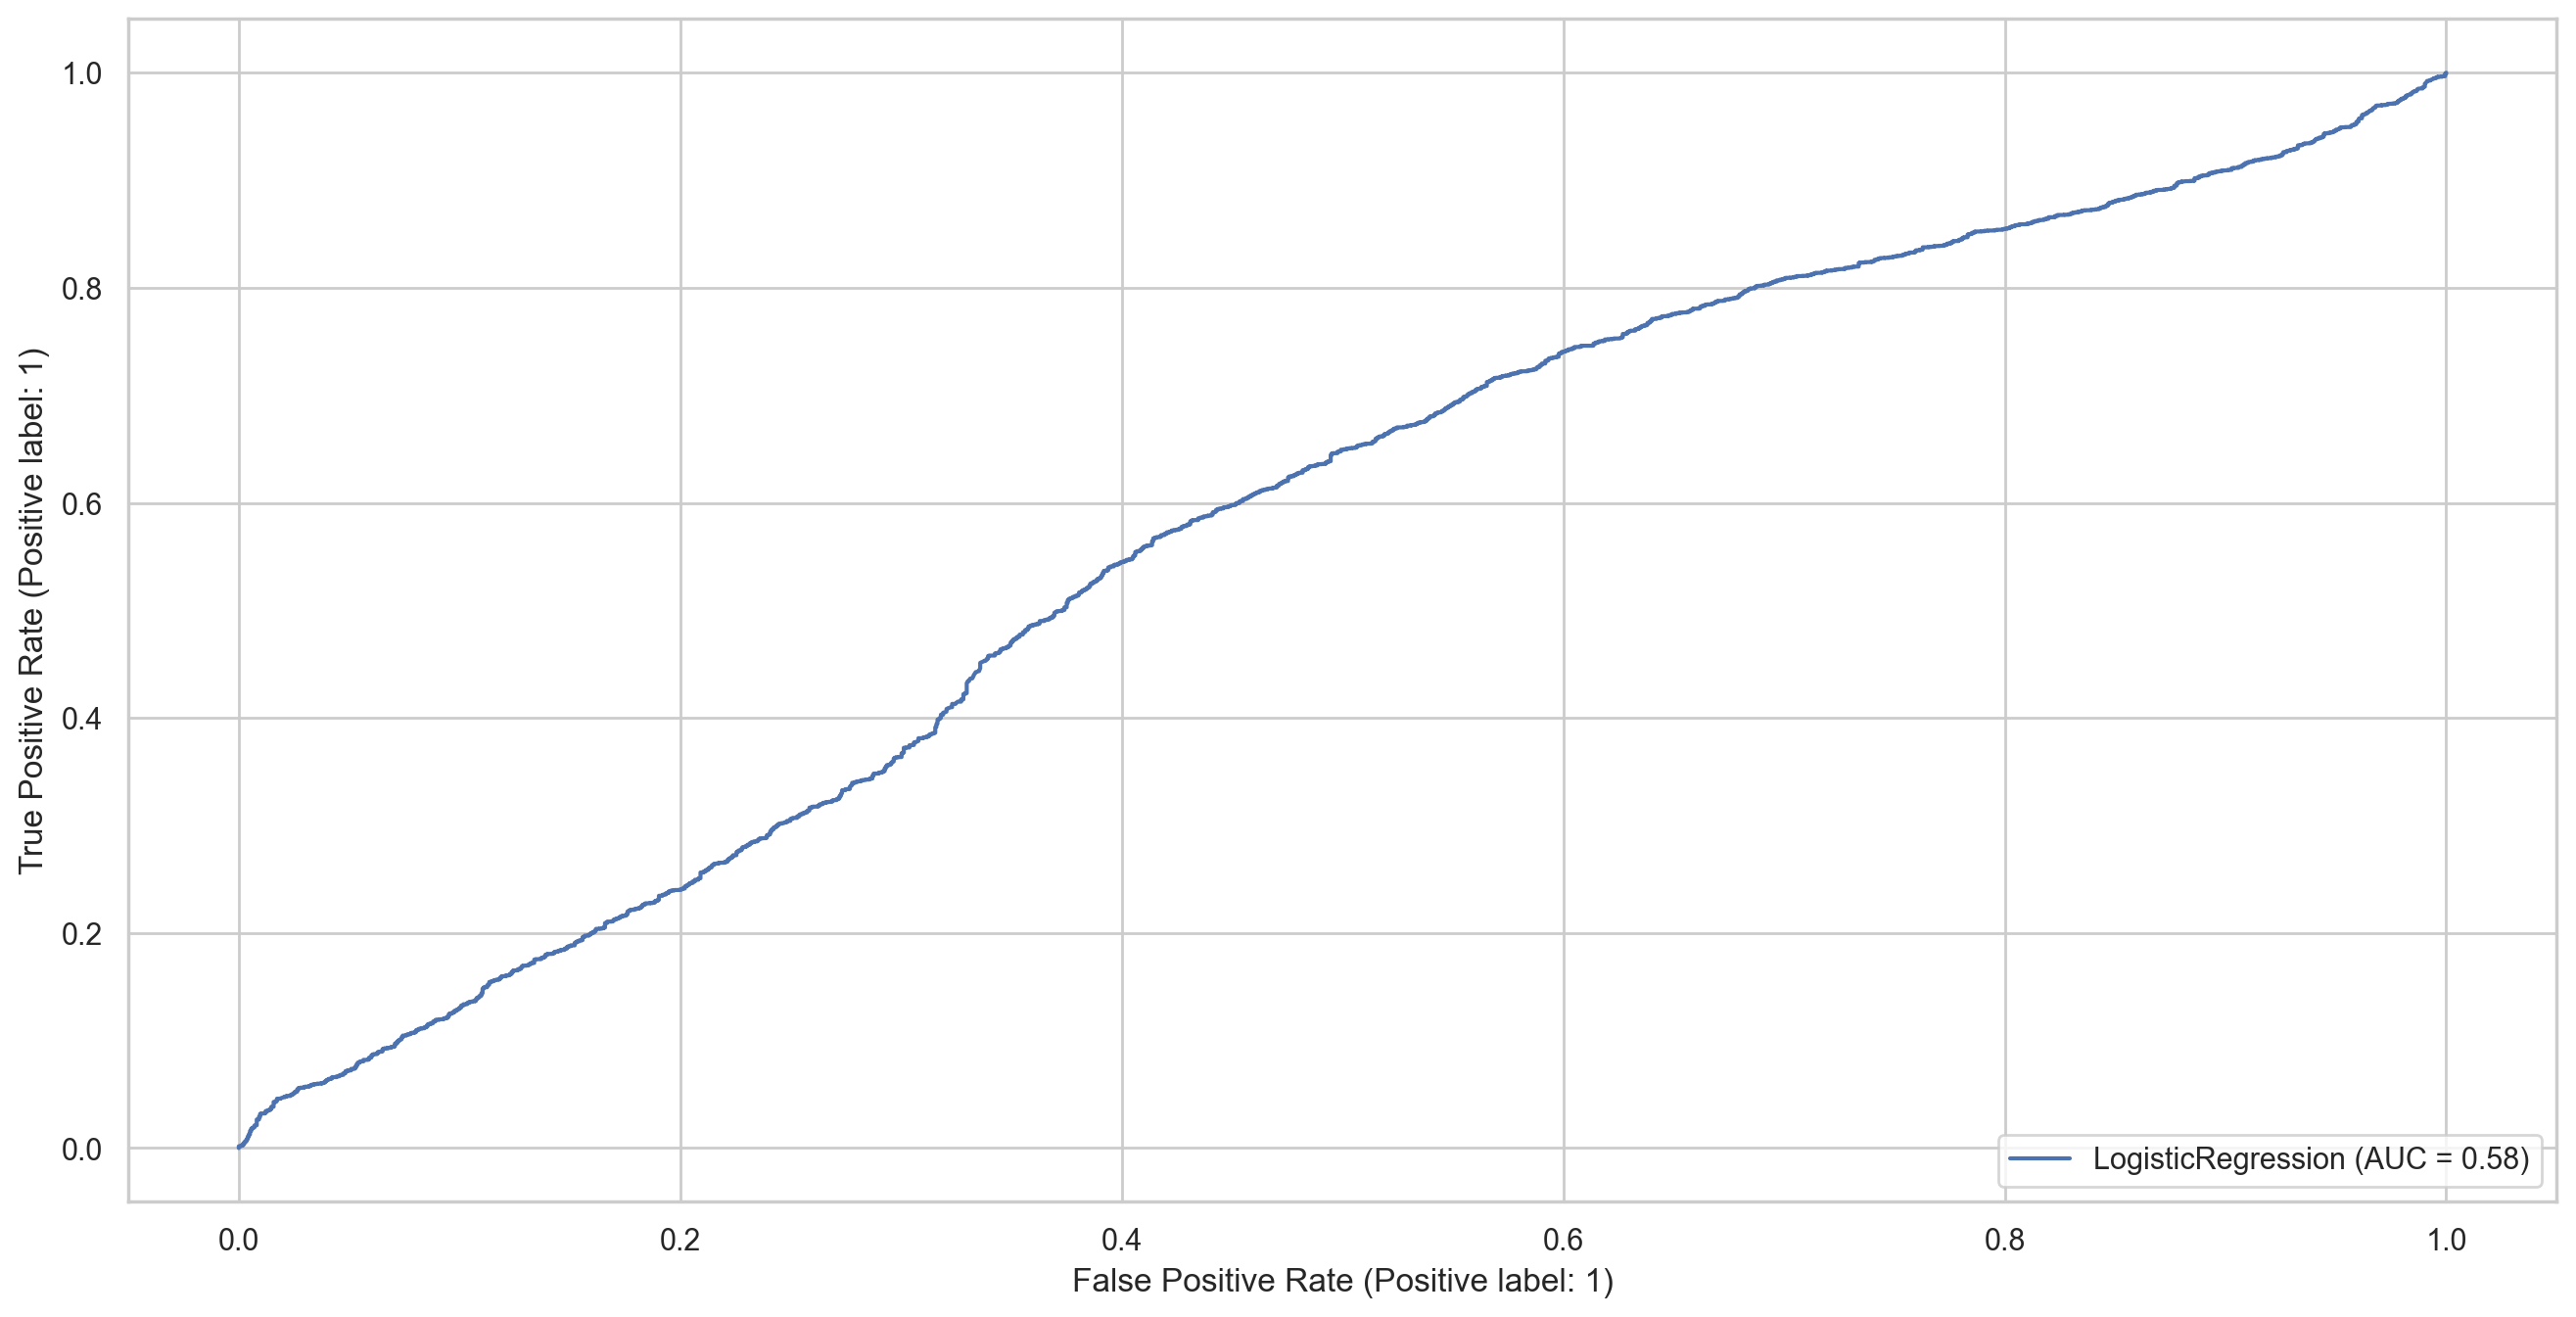

In [577]:
plot_roc_curve(log_model, X_test, y_test);

In [531]:
log_model.coef_

array([[ 3.80862709e-02,  9.23666724e-06, -6.09960716e-03,
         1.89523486e-03,  1.53617761e-03,  1.48777222e+00,
        -2.45578182e-01,  2.51821357e-01]])

In [571]:
log_model.predict_proba(X_test)

array([[0.25650499, 0.74349501],
       [0.24884002, 0.75115998],
       [0.33955407, 0.66044593],
       ...,
       [0.32396281, 0.67603719],
       [0.29063908, 0.70936092],
       [0.40217073, 0.59782927]])

In [540]:
#report = classification_report(y_test, y_test_preds)
#report

In [547]:
lm_model = LinearRegression(normalize = True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) 

0.014464410550171336


In [568]:
y_test_preds_true = y_test_preds
y_test_preds_true[y_test_preds_true >= 0.5] = 1
y_test_preds_true[y_test_preds_true < 0.5] = 0

In [569]:
confusion_matrix(y_test, y_test_preds_true)

array([[   0, 1965],
       [   0, 4293]])

In [557]:
lm_model.coef_

array([ 7.73572477e-03,  1.76145661e-06, -1.27432261e-03,  3.70573559e-04,
        3.11981239e-04,  2.15296362e-01, -5.27444387e-02,  5.17460919e-02])

---

Making inference

In [560]:
import statsmodels.api as sm

In [561]:
X2 = sm.add_constant(X)

In [562]:
model = sm.Logit(y, X2)

In [563]:
result = model.fit(method ='newton')

Optimization terminated successfully.
         Current function value: 0.607488
         Iterations 6


In [564]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 remain   No. Observations:                20858
Model:                          Logit   Df Residuals:                    20849
Method:                           MLE   Df Model:                            8
Date:                Fri, 07 May 2021   Pseudo R-squ.:                 0.01705
Time:                        23:26:04   Log-Likelihood:                -12671.
converged:                       True   LL-Null:                       -12891.
Covariance Type:            nonrobust   LLR p-value:                 6.618e-90
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.0969      0.053     20.676      0.000       0.993       1.201
bedrooms                           0.0288      0.018      1.612      0.107      -0.006       0.064
price2                          5.045e-05   4.42e-05      1.140      0.254   -3.63e-05       0.000
availability_90                   -0.0056      0.000    -13.302      0.000      -0.006      -0.005
number_of_reviews                  0.0020      0.000      7.814      0.000       0.002       0.003
calculated_host_listings_count     0.0012      0.001      2.287      0.022       0.000       0.002
room_type_Hotel room               1.3956      0.165      8.437      0.000       1.071       1.720
room_type_Private room            -0.2474      0.038     -6.548      0.000      -0.321      -0.173
room_type_Shared room              0.2384      0.152      1.566      0.117      -0.060       0.537
==================================================================================================
"""

In [565]:
result.pred_table()

array([[    0.,  6438.],
       [    0., 14420.]])

`Considerations:`  
-The threshold (0.5) is too low, especially considered the imbalanced of the dependent variable. Thus, the classification is not very good. 